In [2]:
from fastai.vision.all import *
import gradio as gr

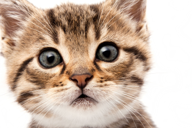

In [3]:
image = PILImage.create("images/cat.jpg")
image.thumbnail((192, 192))
image

In [4]:
learn = load_learner("model.pkl")

In [5]:
learn.predict(image)

[W NNPACK.cpp:53] Could not initialize NNPACK! Reason: Unsupported hardware.


('cat', TensorBase(0), TensorBase([1.0000e+00, 3.2905e-06]))

In [14]:
categories = ("Cat", "Dog")

def classify_image(image):
    pred, i, prob = learn.predict(image)
    return dict(zip(categories, map(float, prob)))

In [15]:
classify_image(image)

{'Cat': 0.9999966621398926, 'Dog': 3.290505901532015e-06}

In [16]:
image = gr.inputs.Image(shape=(192, 192))
label = gr.outputs.Label()
examples = ["images/cat.jpg", "images/dog.jpg", "images/dunno.jpg"]

interface = gr.Interface(fn=classify_image, inputs=image, outputs=label, examples=examples)
interface.launch(inline=False)

/Users/tk541/opt/anaconda3/envs/torchenv/lib/python3.10/site-packages/gradio/inputs.py:257: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
/Users/tk541/opt/anaconda3/envs/torchenv/lib/python3.10/site-packages/gradio/deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
/Users/tk541/opt/anaconda3/envs/torchenv/lib/python3.10/site-packages/gradio/outputs.py:197: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(
/Users/tk541/opt/anaconda3/envs/torchenv/lib/python3.10/site-packages/gradio/deprecation.py:40: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
  warnings.warn(value)


Running on local URL:  http://127.0.0.1:7861

To create a public link, set `share=True` in `launch()`.
